<img src="https://github.com/DerekMazino/Inteligencia-Artificial/blob/main/Proyecto-Final-IA-Detector-de-Emociones/Imgs/Banner.png?raw=true">

# **Proyecto Final: Detección de Emociones**

## **Integrantes**

1. Angie Natalia Arías Gómez - 2172017
2. Andrea Sofia Jaimes Alquichire - 2172716
3. Juan Camilo Marín García - 2172969

**INTRODUCCIÓN** 

> *Sabemos que el rostro tiene diferentes rasgos y caracteristicas que permitirían detectar emociones o al menos asimilar cual de ellas se está expresando en mayor proporción, para ello vamos a dar uso a algunos algoritmos y librerías que nos permitan cambiar los rasgos faciales por un mapa de puntos que la computadora puede leer y asociar con las diferentes emociones que implementaremos.*



> *Librerias tales como*:

*   **Opencv-phyton**
*   **dlib**

> OpenCV-Python es una biblioteca de enlaces de Python diseñada para resolver problemas de visión por computadora por ende, es clave para desarrolar algunas pruebas de implementación de lo queremos realizar, por otro lado DLib es una biblioteca poderosa que simplifica el trabajo con ML y visión por computadora.













---



In [12]:
#@title 1. MONTAR EL DRIVE  { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/IA/Proyecto-Final-IA/')

#print(os.getcwd())
#!chmod 777 convert_ipynb.sh run utils/* '''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#@title 2. Cargar Librerias  { display-mode: "form" }
import cv2, glob, random, math, numpy as np, dlib
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## **Paso 1** : Cargar y presentar una imagen

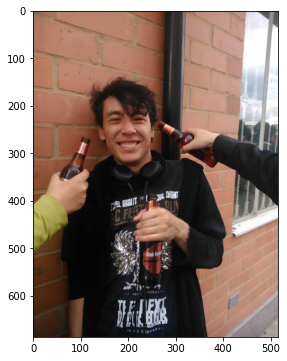

True

In [ ]:
#Usamos imread para cargar la imagen a procesar desde su ruta
img = cv2.imread("dataset/Cristian.jpg")
#Con ctv podemos convertir la imagen de un espacio de color a otro
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Mostramos la imagen por medio de un plot
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()
cv2.imwrite('Cristian0.jpg', img)

## **Paso 2** : Reconocimiento facial

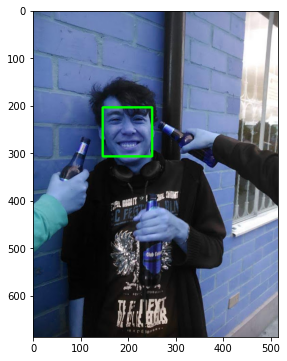

True

In [ ]:
#Convertimos la imagen a escalada de grises
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
#Usamos get_frontal_face_detector() para obtener un detectos de rostros
detector = dlib.get_frontal_face_detector()
#usamos el detector, eviandole la imagen en escala de grises
faces = detector(gray)
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    # Draw a rectangle
    cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(gray)
#plt.savefig("prueba00")
plt.show()
cv2.imwrite('Cristian1.jpg', gray)

## **Paso 3** : Identificación de las características faciales


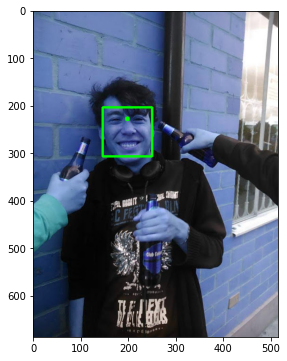

In [ ]:
#Cargamos el predictor, para ello usamos un modelo ya creado que detecta las marcas faciales 
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Look for the landmarks
    landmarks = predictor(image=gray, box=face)
    x = landmarks.part(27).x
    y = landmarks.part(27).y

    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=5, color=(0, 255, 0), thickness=-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(img)
#plt.savefig("prueba00")
plt.show()

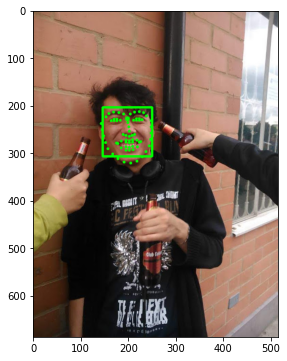

True

In [ ]:
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray, box=face)

    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(img)
#plt.savefig("prueba00")
plt.show()
cv2.imwrite('Cristian3.jpg', img)



# **Como Funciona?**

Nuestro rostro tiene varias características que se pueden identificar, como nuestros ojos, boca, nariz, etc. Cuando usamos algoritmos DLib para detectar estas características, en realidad obtenemos un mapa de puntos que rodean cada característica.

Este mapa compuesto por 67 puntos (llamados puntos de referencia) puede identificar las siguientes características:

<img src="https://github.com/DerekMazino/Inteligencia-Artificial/blob/main/Proyecto-Final-IA-Detector-de-Emociones/Imgs/dlib.png?raw=true" width="500" height="500">


* Puntos de la mandíbula = 0-16
* Puntos de la ceja derecha = 17-21
* Puntos de la frente izquierda = 22-26
* Puntos de la nariz = 27–35
* Puntos del ojo derecho = 36–41
* Puntos del ojo izquierdo = 42–47
* Puntos de boca = 48–60
* Puntos de labios = 61–67


## **Paso 1** : Instanciando los objetos de las librerias a utilizar 

In [3]:
#Creamos una lista con los sentimientos con los que vamos a clasificar
emotions = ["miedo", "feliz", "neutral", "tristeza", "sorpresa", "asco", "enfado"]
#Crear un puntero inteligente
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#get_frontal_face_detector() se usa para detectar donde hay un rostro
detector = dlib.get_frontal_face_detector()
#Shape predictor buscar en la imagen un conjunto de ubicaciones dentro de ella
#Viene con un modelo ya entrenado para buscar marcas faciales
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #archivo de marcas faciales


## **Paso 2** : Cargando el dataset y la imagen que se probará

In [4]:
def get_files(emotion):
  #Usamos glob.glob para cargar una lista con las rutas de cada archivo
  #Se busca en la carpeta segín la emoción buscada
  files = glob.glob("dataset/%s/*" %emotion)
  #Revolvemos los archivos
  random.shuffle(files)
  #Cargamos trainig con todas las imagenes 
  training = files[:int(len(files))]
  #Predicción será la imagene que queremos analizar
  prediction=['dataset/Cristian.jpg'] #aqui se añade la imagen que quieres procesar
  return training, prediction

## **Paso 3** : Obteniendo las caracterisiticas del rostro por medio de coordenadas

In [5]:
def get_landmarks(image):
   detections = detector(image, 1)
   for k,d in enumerate(detections): #Para todas las cara detectadas de forma individual
      shape = predictor(image, d) 
      xlist = []
      ylist = []
      for i in range(1,68): #Guarda coordenadas X e Y en dos listas
          xlist.append(float(shape.part(i).x))
          ylist.append(float(shape.part(i).y))
  
      xmean = np.mean(xlist) # Obtiene la media de ambos ejes para determinar el centro de gravedad
      ymean = np.mean(ylist)
      xcentral = [(x-xmean) for x in xlist] #calcula distancia entre cada punto y el punto central en ambos ejes
      ycentral = [(y-ymean) for y in ylist]
 
      if xlist[26] == xlist[29]: # Si la coordenada x del conjunto son las mismas, el ángulo es 0,  evitamos el error 'divide by 0' en la función
          anglenose = 0
      else:
          anglenose = int(math.atan((ylist[26]-ylist[29])/(xlist[26]-xlist[29]))*180/math.pi)
 
      if anglenose < 0:
          anglenose += 90
      else:
          anglenose -= 90
 
      landmarks_vectorised = []
      for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
          landmarks_vectorised.append(x)
          landmarks_vectorised.append(y)
          meannp = np.asarray((ymean,xmean))
          coornp = np.asarray((z,w))
          dist = np.linalg.norm(coornp-meannp)
          anglerelative = (math.atan((z-ymean)/(w-xmean))*180/math.pi) - anglenose
          landmarks_vectorised.append(dist)
          landmarks_vectorised.append(anglerelative)
 
   if len(detections) < 1: 
       landmarks_vectorised = "error"
   return landmarks_vectorised

## **Paso 4** : Creando los sets de entrenamiento

In [6]:
def make_sets():
  training_data = []
  training_labels = []
  prediction_data = []
  prediction_labels = []
  training = []
  prediction = []
  for emotion in emotions:
      training, prediction = get_files(emotion)
      #Append data to training and prediction list, and generate labels 0-7
      for item in training:
          image = cv2.imread(item) #open image
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convertimos a escala de grises
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             training_data.append(landmarks_vectorised) # vector de imágenes a la lista de datos de entrenamiento
             training_labels.append(emotions.index(emotion))
  
      for item in prediction:
          image = cv2.imread(item)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             prediction_data.append(landmarks_vectorised)
             prediction_labels.append(emotions.index(emotion))
 
  return training_data, training_labels, prediction_data, prediction_labels,

## **Paso 5** : Haciendo el entrenamiento y testeo para cada emoción usando SVC


In [7]:
def usandoSVM():
  #Establece el clasificador como un vector de apoyo de máquinas polinomial kernel
  clf = SVC(kernel='linear', probability=True, tol=1e-3)
  probam1 = np.zeros((7,10))
  probam2 = np.zeros((1,7))
  
  accur_lin = []
  training_data, training_labels, prediction_data, prediction_labels = make_sets()
  for i in range(0,10):
    #print("Making sets %s" %i) #hace un muestreo aleatorio 80/20%
    
    npar_train = np.array(training_data) #gira el conjunto de entrenamiento en una matriz numpy para el clasificador
    npar_trainlabs = np.array(training_labels)
    #print("training SVM linear %s" %i) #entrenamiento SVM
    clf.fit(npar_train, training_labels)
    #print("getting accuracies %s" %i) #Utilice la función score () para obtener mayor precisión
    npar_pred = np.array(prediction_data)
    pred_lin = clf.score(npar_pred, prediction_labels)
    #print ("linear: ", pred_lin)
    accur_lin.append(pred_lin) #guarda la precision en una lista
    proba=clf.predict_proba(prediction_data)
    #print ("proba: ", proba)
    probam1[:,i]=proba[1,:]
    probam2=proba[1,:]+probam2
    #probam(:,i)=probam+proba
  return probam2, accur_lin

## Pruebas con Ramdom Forest






In [8]:
def usandoRFC():
  #Establece el clasificador como un vector de apoyo de máquinas polinomial kernel
  rfc = RandomForestClassifier(max_depth=2, random_state=0, criterion='gini')
  probam1 = np.zeros((7,10))
  probam2 = np.zeros((1,7))
  
  accur_lin = []
  training_data, training_labels, prediction_data, prediction_labels = make_sets()
  for i in range(0,10):
    #print("Making sets %s" %i) #hace un muestreo aleatorio 80/20%
    
    npar_train = np.array(training_data) #gira el conjunto de entrenamiento en una matriz numpy para el clasificador
    npar_trainlabs = np.array(training_labels)
    #print("training RFC %s" %i) #entrenamiento RFC
    rfc.fit(npar_train, training_labels)
    #print("getting accuracies %s" %i) #Utilice la función score () para obtener mayor precisión
    npar_pred = np.array(prediction_data)
    pred_lin = rfc.score(npar_pred, prediction_labels)
    #print ("linear: ", pred_lin)
    accur_lin.append(pred_lin) #guarda la precision en una lista
    proba=rfc.predict_proba(prediction_data)
    #print ("proba: ", proba)
    probam1[:,i]=proba[1,:]
    probam2=proba[1,:]+probam2
    #print("Bandera", probam2)
    #probam(:,i)=probam+proba
  return probam2, accur_lin

## **Paso 6** : Organizando los datos para ponerlos en la imagen usando SVM

In [9]:
probam2, accur_lin= usandoSVM()
proba=probam2/10 
p1=round(proba[0,0],2)
p2=round(proba[0,1],2)
p3=round(proba[0,2],2)
p4=round(proba[0,3],2)
p5=round(proba[0,4],2)
p6=round(proba[0,5],2)
p7=round(proba[0,6],2)
print("Mean value lin svm: %.3f" %np.mean(accur_lin)) #hacemos 10 ejecuciones para aumentar precision
 
frame1=cv2.imread('dataset/Cristian.jpg') #aqui se añade la imagen que quieres procesar pero aqui solo se carga para el resultado final
#ploteamos el resultado
cv2.putText(frame1, "Miedo: {}".format(p1), (10, 40),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Feliz: {:.2f}".format(p2), (10, 80),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Neutral: {}".format(p3), (10, 120),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Triste: {:.2f}".format(p4), (10, 160),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Sorpresa: {:.2f}".format(p5), (10, 200),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Disgusto: {:.2f}".format(p6), (10, 240),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame1, "Enfado: {:.2f}".format(p7), (10, 280),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
  
img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


Mean value lin svm: 0.143



## **Paso 7**: Organizando los datos para ponerlos en la imagen usando Random Forest Classifier




In [10]:
probam, accur_line= usandoRFC()
proba=probam/10 
p1=round(proba[0,0],2)
p2=round(proba[0,1],2)
p3=round(proba[0,2],2)
p4=round(proba[0,3],2)
p5=round(proba[0,4],2)
p6=round(proba[0,5],2)
p7=round(proba[0,6],2)
print("Mean value lin RFC: %.3f" %np.mean(accur_line)) #hacemos 10 ejecuciones para aumentar precision
 
frame2=cv2.imread('dataset/Cristian.jpg') #aqui se añade la imagen que quieres procesar pero aqui solo se carga para el resultado final
#ploteamos el resultado
cv2.putText(frame2, "Miedo: {}".format(p1), (10, 40),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Feliz: {:.2f}".format(p2), (10, 80),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Neutral: {}".format(p3), (10, 120),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Triste: {:.2f}".format(p4), (10, 160),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Sorpresa: {:.2f}".format(p5), (10, 200),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Disgusto: {:.2f}".format(p6), (10, 240),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
cv2.putText(frame2, "Enfado: {:.2f}".format(p7), (10, 280),
 cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 93, 0), 3)
  
img2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


Mean value lin RFC: 0.143



## **EJEMPLOS**: 




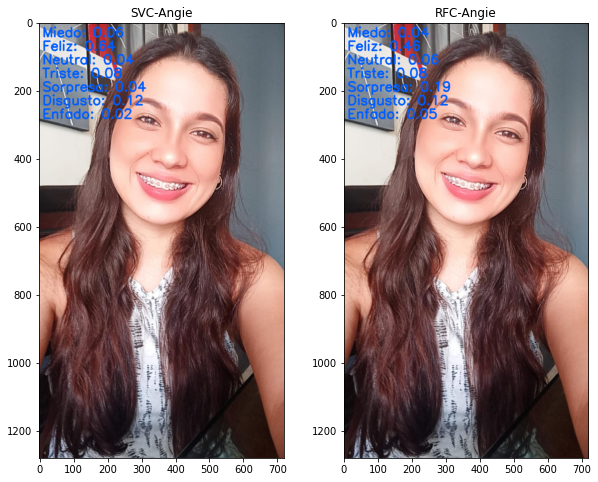

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Angie")
ax1.imshow(img1)
ax2.set_title("RFC-Angie")
ax2.imshow(img2)

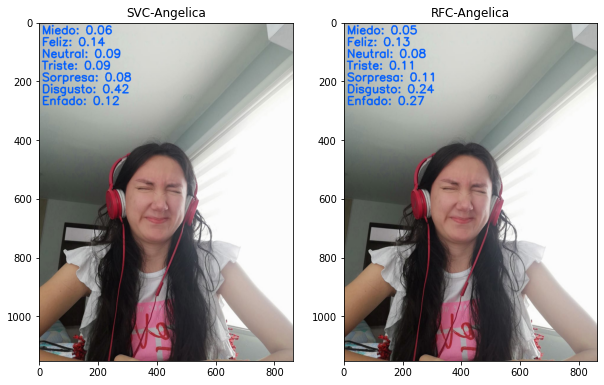

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Angelica")
ax1.imshow(img1)
ax2.set_title("RFC-Angelica")
ax2.imshow(img2)

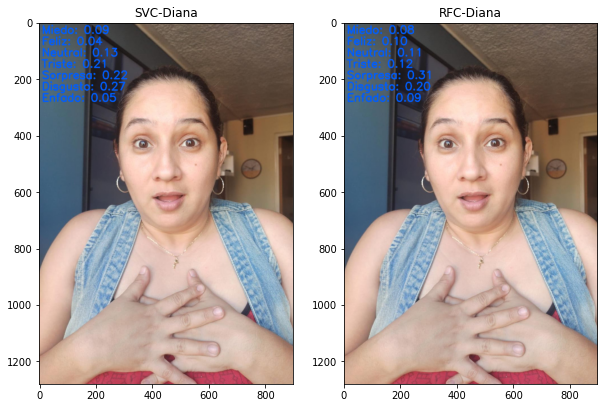

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Diana")
ax1.imshow(img1)
ax2.set_title("RFC-Diana")
ax2.imshow(img2)

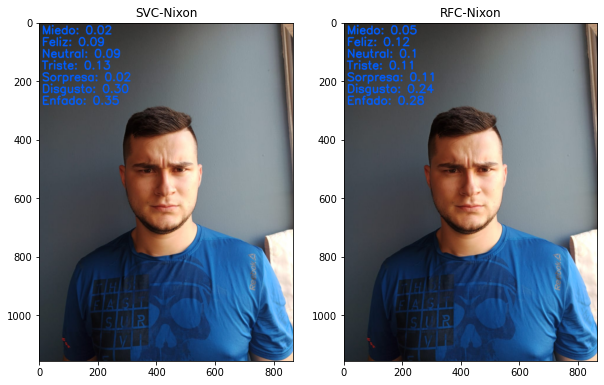

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Nixon")
ax1.imshow(img1)
ax2.set_title("RFC-Nixon")
ax2.imshow(img2)

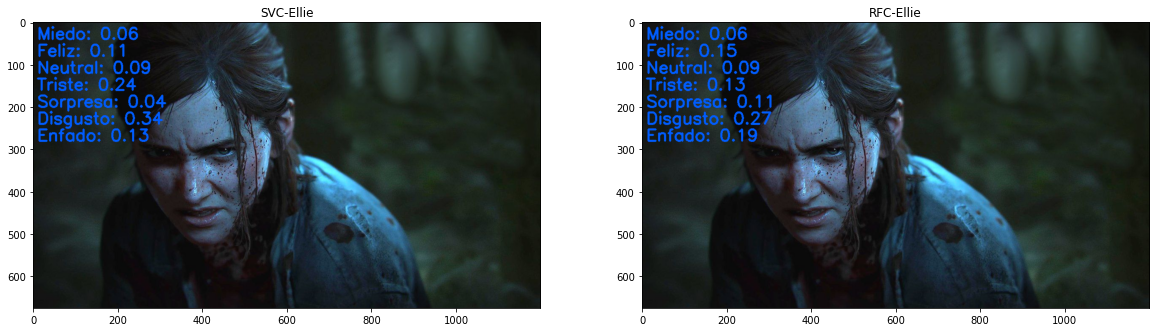

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,16))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Ellie")
ax1.imshow(img1)
ax2.set_title("RFC-Ellie")
ax2.imshow(img2)

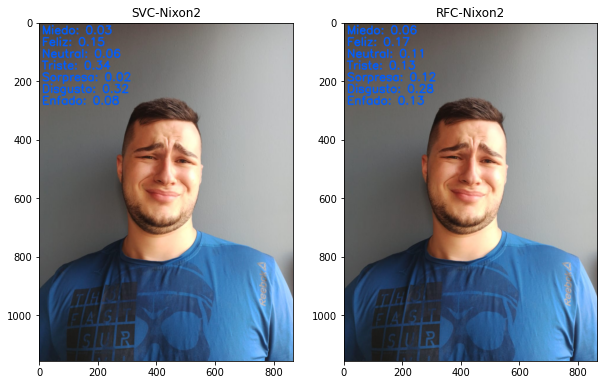

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Nixon2")
ax1.imshow(img1)
ax2.set_title("RFC-Nixon2")
ax2.imshow(img2)

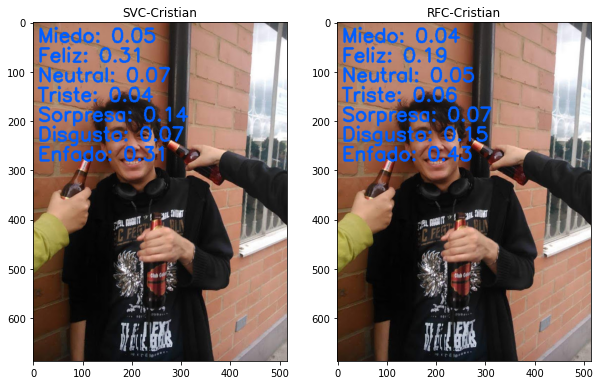

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle('Pruebas usando SVM y RFC')
ax1.set_title("SVC-Cristian")
ax1.imshow(img1)
ax2.set_title("RFC-Cristian")
ax2.imshow(img2)